<a href="https://colab.research.google.com/github/abhay43/ML_Code/blob/master/DL-%20Auto%20Decoder%20in%20mnist%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Input

import numpy as np

In [11]:
# Creating the layers 
input_img = Input(shape=(784, ))

# encoded layer 
encoded = Dense(32, activation ='relu')(input_img)

# decoded layer 
decoded = Dense(784, activation = 'sigmoid')(encoded)



In [68]:
model_0 = Model(input_img, decoded)
model_0.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [69]:
encoded_model_0 = Model(input_img, encoded)
encoded_model_0.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [70]:
encoder_input = Input(shape=(32,)) 
decoder_output = model_0.layers[-1]

In [71]:
decoded_model_0 = Model(encoder_input, decoder_output(encoder_input)) 
decoded_model_0.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [78]:
model_0.compile(
    optimizer = tf.keras.optimizers.Adam(lr = 0.001),
    loss=['binary_crossentropy']
)

In [73]:
model_0.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [74]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

In [75]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32')/ 255

x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))

In [76]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [79]:
model_0.fit(
    x_train, x_train, batch_size = 250, epochs = 50, shuffle= True, verbose = 1, validation_data=(x_test, x_test)
)

Epoch 1/50
240/240 [==============================] - 2s 9ms/step - loss: 3.0793 - val_loss: 1.5792
Epoch 2/50
240/240 [==============================] - 2s 9ms/step - loss: 1.0673 - val_loss: 0.7025
Epoch 3/50
240/240 [==============================] - 2s 9ms/step - loss: 0.5337 - val_loss: 0.4057
Epoch 4/50
240/240 [==============================] - 2s 9ms/step - loss: 0.3431 - val_loss: 0.2928
Epoch 5/50
240/240 [==============================] - 2s 9ms/step - loss: 0.2670 - val_loss: 0.2456
Epoch 6/50
240/240 [==============================] - 2s 9ms/step - loss: 0.2332 - val_loss: 0.2225
Epoch 7/50
240/240 [==============================] - 2s 9ms/step - loss: 0.2151 - val_loss: 0.2087
Epoch 8/50
240/240 [==============================] - 2s 9ms/step - loss: 0.2034 - val_loss: 0.1987
Epoch 9/50
240/240 [==============================] - 2s 9ms/step - loss: 0.1948 - val_loss: 0.1912
Epoch 10/50
240/240 [==============================] - 2s 9ms/step - loss: 0.1881 - val_loss: 0.1851

In [80]:
encoded_img = encoded_model_0.predict(x_test)

In [81]:
decoded_img = decoded_model_0.predict(encoded_img)

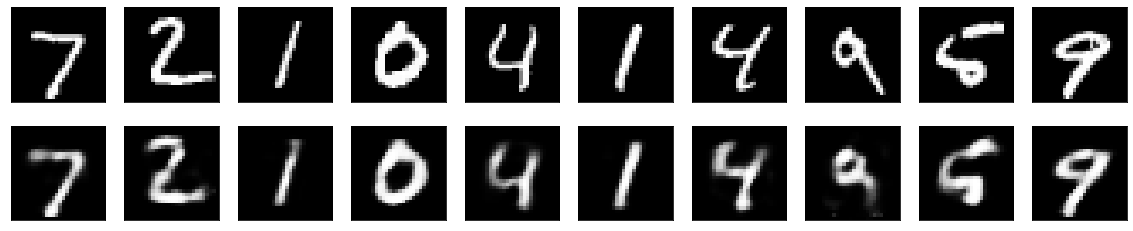

In [82]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
  ax = plt.subplot(2, n , i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n , i+1 +n)
  plt.imshow(decoded_img[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
